In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

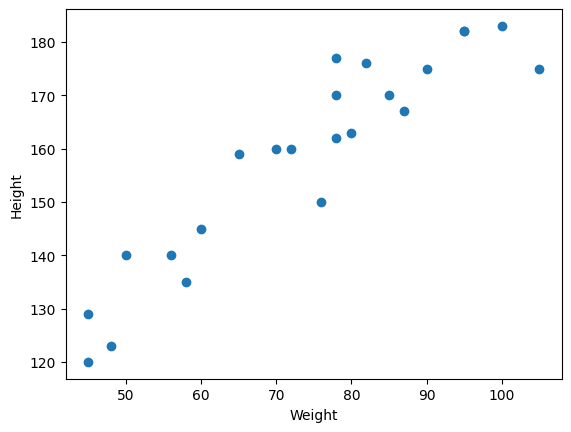

In [8]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
#finding correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


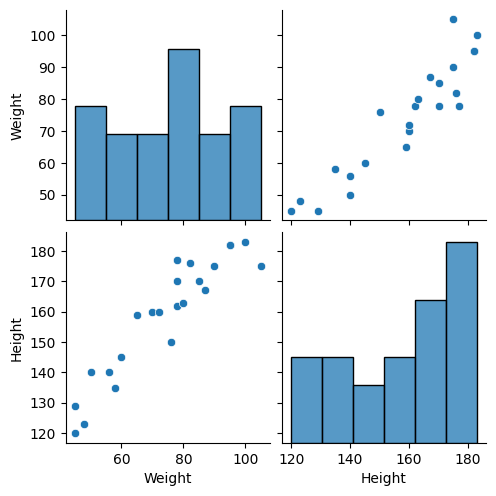

In [12]:
#seaborn for visualisation
import seaborn as sns
sns.pairplot(df)

In [ ]:
#independent features and dependent features
X=df[['Weight']]   #independent features should be 2-d array or data framey
y=df['Height']


In [21]:
np.array(X).shape

(23, 1)

In [24]:
np.array(y).shape

(23,)

In [28]:
#train test split
from sklearn.model_selection import train_test_split

                                              

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
X_train.shape

(17, 1)

In [33]:
y_train.shape

(17,)

In [34]:
#standarization
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)


In [40]:
X_test=scaler.transform(X_test)


In [41]:
#apply simple linear regression
from sklearn.linear_model import LinearRegression


In [44]:
regression=LinearRegression(n_jobs=-1)

In [45]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [47]:
print('Coefficient or slope:',regression.coef_) 
print('Intercept',regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept 156.47058823529412


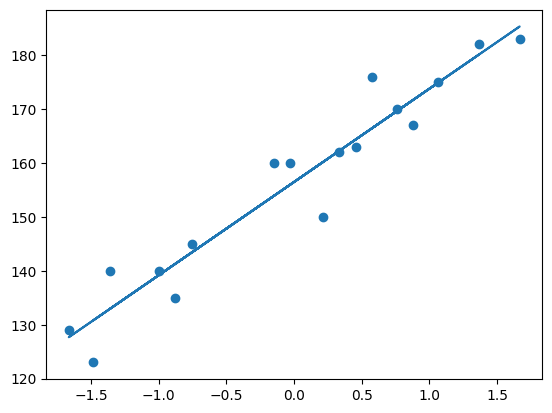

In [48]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [49]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [50]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [52]:
from sklearn.metrics import r2_score

In [53]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [54]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [56]:
## OLS Linear Regression
import statsmodels.api as sm

In [57]:
model=sm.OLS(y_train,X_train).fit()

In [58]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [59]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 05 Sep 2025   Prob (F-statistic):                       0.664
Time:                        15:09:23   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

array([1401.94139895])